In [1]:
#Load Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pdfplumber pandas    #installing packages
!pip install -U scikit-learn
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [37]:
#Importing Libraries
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Loading and Converting your PDF files to Excel
Here we are first loading our first PDF file. We then use the library pdfplumber to convert the pdf file into an excel file. We name the first Excel file as **Loans_excel_file.xlsx**.

In [26]:
# Replace with the path to your PDF folder containing the pdf files
%cd /content/drive/MyDrive/New_PDA_Project

pdf_file_path = 'PDA - Loans_Database_Table.pdf'

# Replace 'output_excel_file.xlsx' with the desired name for the Excel file
excel_file_path = 'Loans_excel_file.xlsx'

data_list = []

with pdfplumber.open(pdf_file_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        lines = text.split('\n')  # Split text into lines
        for line in lines:
            cells = line.split()  # Split each line into cells using spaces
            data_list.append(cells)

# Create a DataFrame from the extracted data
df = pd.DataFrame(data_list)

# Save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False, header=False)

print(f"PDF text has been converted and saved to {excel_file_path}")

/content/drive/MyDrive/New_PDA_Project
PDF text has been converted and saved to Loans_excel_file.xlsx


We now merge these two files **Loans_excel_file1.xlsx** and **PDA - Zappy Loan Data (15).xlsx** horizontally to create a merged file named **Merged_Data.xlsx**

In [28]:
# Replace with the paths to your Excel files
excel_file_path1 = 'PDA - Zappy Loan Data (15).xlsx'
excel_file_path2 = 'Loans_excel_file.xlsx'

# Load the Excel files into DataFrames
df1 = pd.read_excel(excel_file_path1)
df2 = pd.read_excel(excel_file_path2)

# Merge the DataFrames based on the common columns (assuming the first row contains column headers)
merged_df = pd.merge(df1, df2, on=list(df1.columns), how='outer')

# Save the merged DataFrame to a new Excel file
merged_excel_file_path = 'Merged_Data.xlsx'
merged_df.to_excel(merged_excel_file_path, index=False, engine='openpyxl')

# Display the merged DataFrame
merged_df.head()


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


# Cleaning the Data
We load the merged excel sheet. By using the df.drop_duplicates we remove any duplicate values in our data.

The code computes the count of missing values for each column and displays columns with missing data. Depending on the column, you can choose how to handle missing values. In the example, we fill missing values in the 'LoanAmount' column with the median value. You can customize the approach for each column.


Outliers are data points significantly different from the majority of the data. You can decide how to handle outliers based on the visualization. In the example, we use z-scores to identify and remove extreme outliers (those with a z-score greater than 3)

Finally, the cleaned dataset is saved to an Excel file named 'cleaned_loan_data.xlsx to our drive.

In [42]:
# Replace with the path to your merged Excel file
merged_excel_file_path = '/content/drive/MyDrive/New_PDA_Project/Merged_Data.xlsx'

# Load the merged data into a DataFrame
merged_df = pd.read_excel(merged_excel_file_path)

# Display basic information about the dataset
print("Data Information:")
print(merged_df.info())

# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Separate the target variable (last column) from the features
X = merged_df.iloc[:, :-1]  # All columns except the last one
y = merged_df.iloc[:, -1]   # Last column (target variable)

# Handling missing values for features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Combine the imputed features with the target variable
merged_df_imputed = pd.concat([X_imputed, y], axis=1)

# Check for outliers using Z-score (excluding the target variable)
z_scores = abs(zscore(X_imputed))
outliers = (z_scores > 3).all(axis=1)

# Display information about outliers
print("\nOutliers:")
print(merged_df_imputed[outliers])

# Remove outliers
merged_df_no_outliers = merged_df_imputed[~outliers]

# Display basic statistics after handling outliers
print("\nStatistics after Handling Outliers:")
print(merged_df_no_outliers.describe())

# Save the cleaned DataFrame to a new Excel file
cleaned_excel_file_path = '/content/drive/MyDrive/New_PDA_Project/Cleaned_Data.xlsx'
merged_df_no_outliers.to_excel(cleaned_excel_file_path, index=False, engine='openpyxl')

print(f"\nCleaned data has been saved to {cleaned_excel_file_path}")



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            642 non-null    int64  
 1   Gender             642 non-null    int64  
 2   Married            642 non-null    int64  
 3   Dependents         642 non-null    int64  
 4   Graduate           642 non-null    int64  
 5   Self_Employed      642 non-null    int64  
 6   ApplicantIncome    642 non-null    int64  
 7   CoapplicantIncome  642 non-null    float64
 8   LoanAmount         642 non-null    int64  
 9   Loan_Amount_Term   642 non-null    int64  
 10  Credit_History     642 non-null    int64  
 11  Property_Area      642 non-null    int64  
 12  Loan_Status        642 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 65.3+ KB
None

Missing Values:
Loan_ID              0
Gender               0
Married              0
De

# Exploratory Data Analysis
Here we will visualize the data and look at how it is distributed. We will create several charts and graphs to properly understand the data.

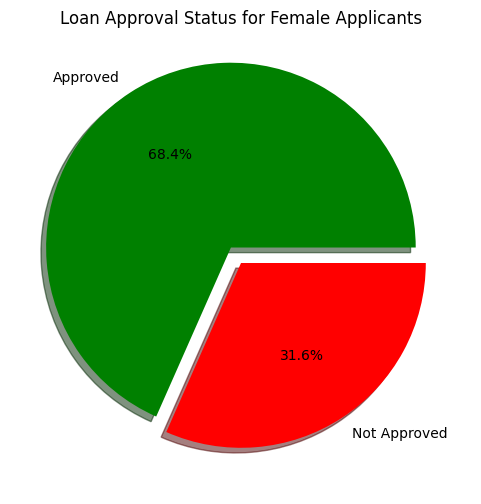

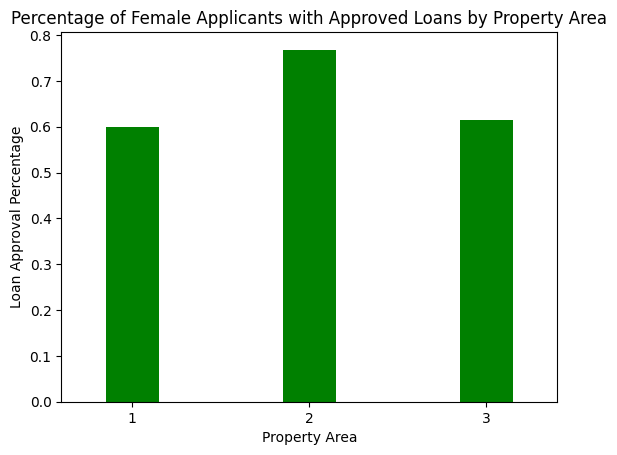

In [43]:
# Load your cleaned dataset
df = pd.read_excel('Cleaned_Data.xlsx')

# Filter the data to include only female applicants
female_applicants = df[df['Gender'] == 2]

# Calculate the percentage of female applicants with loan approval
female_approved_percentage = (female_applicants['Loan_Status'] == 'Y').mean() * 100

# Create a pie chart to display the percentage of female applicants with and without loan approval
labels = ['Approved', 'Not Approved']
sizes = [female_approved_percentage, 100 - female_approved_percentage]
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the 'Approved' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Loan Approval Status for Female Applicants')
plt.show()

# Group data by 'Property_Area' and calculate the percentage of female applicants with loan approval in each area
property_groups = female_applicants.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot the bar chart
property_groups['Y'].plot(kind='bar', color='green', width=0.3)

plt.xlabel('Property Area')
plt.ylabel('Loan Approval Percentage')
plt.title('Percentage of Female Applicants with Approved Loans by Property Area')
plt.xticks(rotation=0)
plt.show()



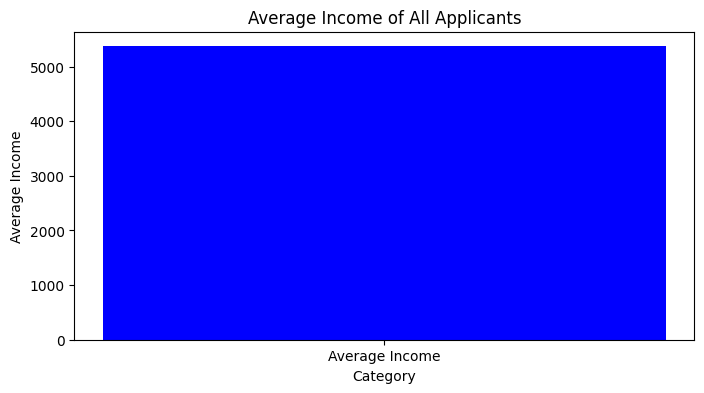

In [44]:
# Calculate the average income of all applicants
average_income = df['ApplicantIncome'].mean()

# Create a bar chart to display the average income
plt.figure(figsize=(8, 4))
plt.bar(['Average Income'], [average_income], color='blue')
plt.xlabel('Category')
plt.ylabel('Average Income')
plt.title('Average Income of All Applicants')
plt.show()

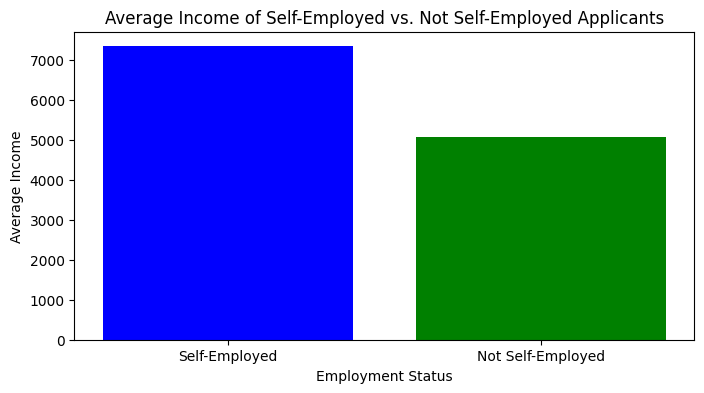

In [45]:
# Calculate the average income for self-employed applicants
self_employed_avg_income = df[df['Self_Employed'] == 1]['ApplicantIncome'].mean()

# Calculate the average income for non-self-employed applicants
not_self_employed_avg_income = df[df['Self_Employed'] == 0]['ApplicantIncome'].mean()

# Create a bar chart to compare the average income
categories = ['Self-Employed', 'Not Self-Employed']
average_incomes = [self_employed_avg_income, not_self_employed_avg_income]

plt.figure(figsize=(8, 4))
plt.bar(categories, average_incomes, color=['blue', 'green'])
plt.xlabel('Employment Status')
plt.ylabel('Average Income')
plt.title('Average Income of Self-Employed vs. Not Self-Employed Applicants')
plt.show()

The average income of graduate applicants is: 5818.70


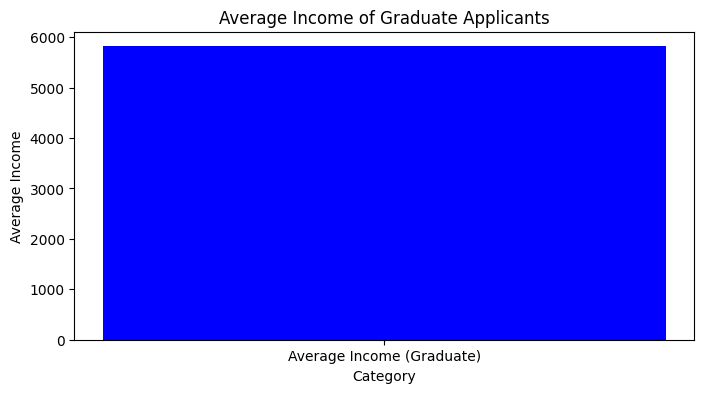

In [46]:
# Calculate the average income for graduate applicants
average_income_graduate = df[df['Graduate'] == 1]['ApplicantIncome'].mean()

print(f"The average income of graduate applicants is: {average_income_graduate:.2f}")

# Create a bar chart to display the average income
plt.figure(figsize=(8, 4))
plt.bar(['Average Income (Graduate)'], [average_income_graduate], color='blue')
plt.xlabel('Category')
plt.ylabel('Average Income')
plt.title('Average Income of Graduate Applicants')
plt.show()

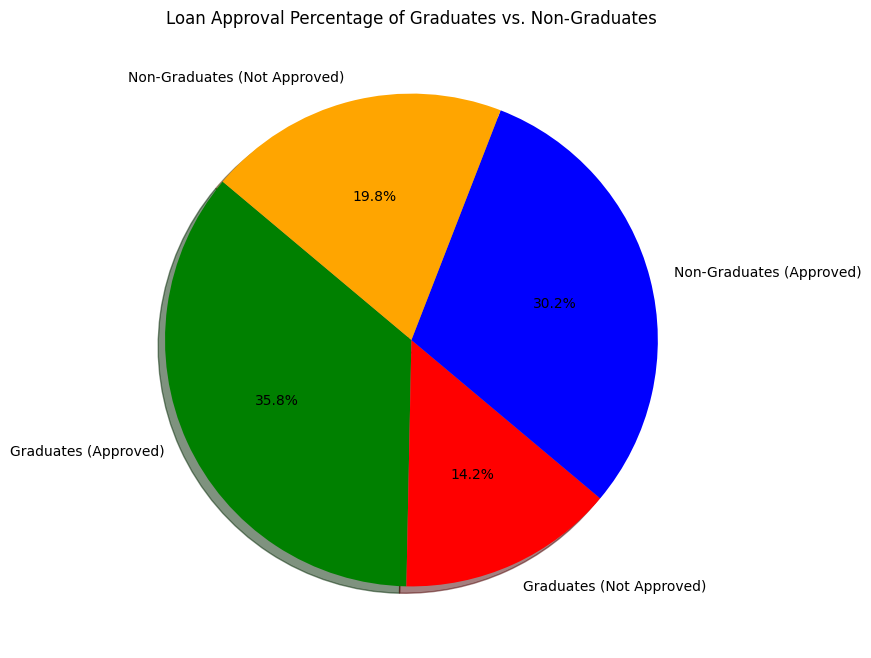

In [47]:
# Calculate the percentage of graduates with loans approved
graduates_approved = df[(df['Graduate'] == 1) & (df['Loan_Status'] == 'Y')].shape[0] / df[df['Graduate'] == 1].shape[0] * 100

# Calculate the percentage of non-graduates with loans approved
non_graduates_approved = df[(df['Graduate'] == 0) & (df['Loan_Status'] == 'Y')].shape[0] / df[df['Graduate'] == 0].shape[0] * 100

# Create a pie chart to compare the percentages
labels = ['Graduates (Approved)', 'Graduates (Not Approved)', 'Non-Graduates (Approved)', 'Non-Graduates (Not Approved)']
sizes = [graduates_approved, 100 - graduates_approved, non_graduates_approved, 100 - non_graduates_approved]
colors = ['green', 'red', 'blue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Loan Approval Percentage of Graduates vs. Non-Graduates')
plt.show()

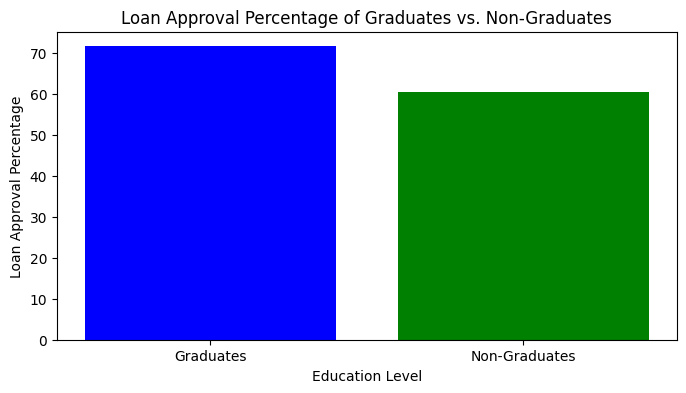

In [48]:
# Calculate the percentage of graduates with loans approved
graduates_approved = df[(df['Graduate'] == 1) & (df['Loan_Status'] == 'Y')].shape[0] / df[df['Graduate'] == 1].shape[0] * 100

# Calculate the percentage of non-graduates with loans approved
non_graduates_approved = df[(df['Graduate'] == 0) & (df['Loan_Status'] == 'Y')].shape[0] / df[df['Graduate'] == 0].shape[0] * 100

# Create a bar chart to compare the percentages
categories = ['Graduates', 'Non-Graduates']
approval_percentages = [graduates_approved, non_graduates_approved]

plt.figure(figsize=(8, 4))
plt.bar(categories, approval_percentages, color=['blue', 'green'])
plt.xlabel('Education Level')
plt.ylabel('Loan Approval Percentage')
plt.title('Loan Approval Percentage of Graduates vs. Non-Graduates')
plt.show()

# Applying Logistic Regression
First we load the data. Then we econde the target variable 'Loan_Status' to be numeric, mapping 'N' to 0 (indicating not approved) and 'Y' to 1 (indicating approved).

Then we separate the dataset into features (X), which are all columns except 'Loan_Status', and the target variable (y), which is 'Loan_Status' itself.

We split the data into training and testing sets using **train_test_split**. It randomly divides the data into 80% training and 20% testing sets, and the **random_state** parameter ensures reproducibility of the split.

We then create a Logstical Regression model and train it on the training data.

Then we use the training data to make predictions on the test data.

Finally evaluate the model by calculating the accuracy and generating a classification report. The classification report provides various metrics, including precision, recall, F1-score, and support for each class (0 and 1).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.78
Confusion Matrix:
[[20 22]
 [ 6 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        42
           1       0.79      0.93      0.85        87

    accuracy                           0.78       129
   macro avg       0.78      0.70      0.72       129
weighted avg       0.78      0.78      0.77       129



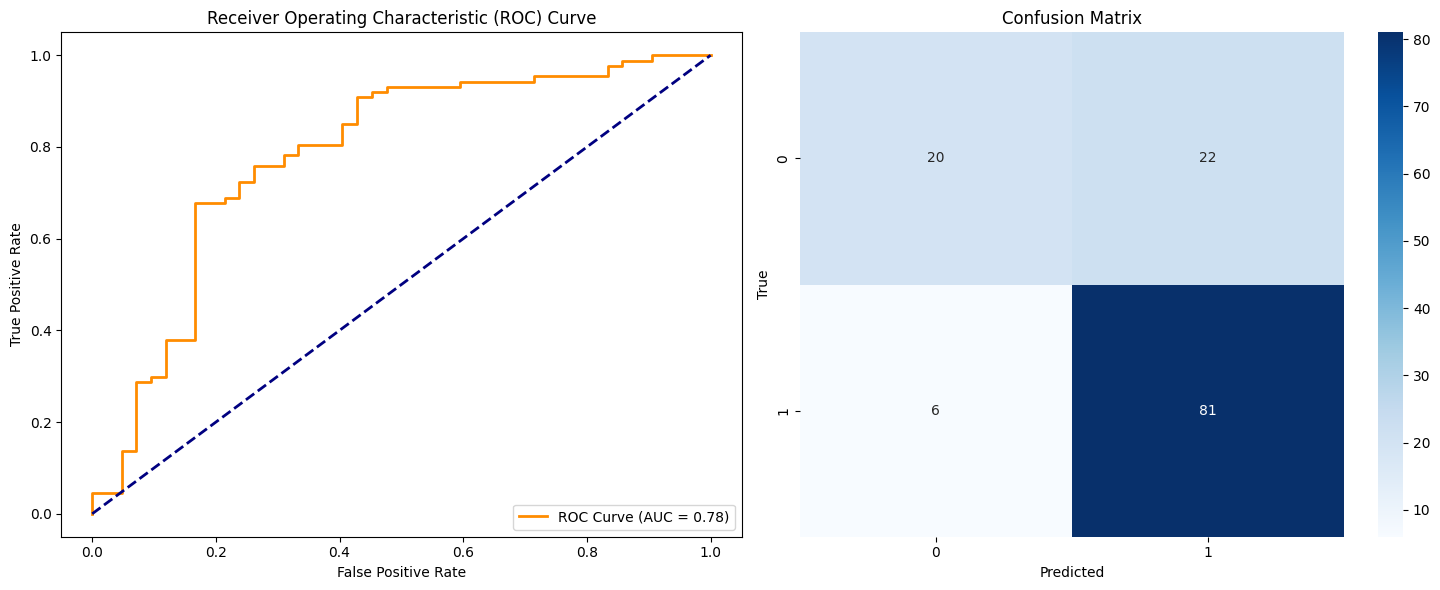

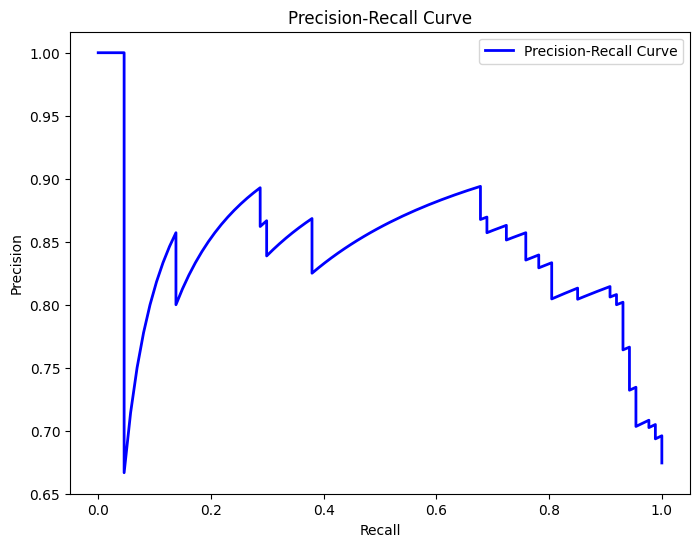

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Replace with the path to your merged Excel file
merged_excel_file_path = '/content/drive/MyDrive/New_PDA_Project/Merged_Data.xlsx'

# Load the merged data into a DataFrame
merged_df = pd.read_excel(merged_excel_file_path)

# Assuming 'Loan_Status' is the target variable
# Replace with the actual name of your target variable if different
target_variable = 'Loan_Status'

# Convert 'Y' and 'N' to 1 and 0
le = LabelEncoder()
merged_df[target_variable] = le.fit_transform(merged_df[target_variable])

# Split the data into features (X) and target variable (y)
X = merged_df.drop(target_variable, axis=1)
y = merged_df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [56]:
# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Create a table from the classification report
report_table = tabulate(pd.DataFrame(report).T, headers='keys', tablefmt='pretty')

print(f'Accuracy: {accuracy:.2f}')
print(report_table)

Accuracy: 0.78
+--------------+--------------------+---------------------+--------------------+--------------------+
|              |     precision      |       recall        |      f1-score      |      support       |
+--------------+--------------------+---------------------+--------------------+--------------------+
|      0       | 0.7692307692307693 | 0.47619047619047616 | 0.588235294117647  |        42.0        |
|      1       | 0.7864077669902912 | 0.9310344827586207  | 0.8526315789473684 |        87.0        |
|   accuracy   | 0.7829457364341085 | 0.7829457364341085  | 0.7829457364341085 | 0.7829457364341085 |
|  macro avg   | 0.7778192681105303 | 0.7036124794745484  | 0.7204334365325077 |       129.0        |
| weighted avg | 0.7808152560918422 | 0.7829457364341085  | 0.7665490676074591 |       129.0        |
+--------------+--------------------+---------------------+--------------------+--------------------+
